In [ ]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 33.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [ ]:
#Instalo librerias
!pip install requests
!pip install alphacast

In [ ]:
from alphacast import Alphacast
import pandas as pd
import io

In [ ]:
API_key = 'ak_Sm9t04ouWlOc4VHzsmgm'


In [ ]:
alphacast = Alphacast(API_key)


In [ ]:
alphacast.datasets.dataset(5288).metadata()


{'id': 5288,
 'name': 'Markets - Argentina - FX premiums - Daily',
 'createdAt': '2020-11-01T17:32:02',
 'updatedAt': '2020-11-01T17:32:02',
 'dataEditedAt': '2024-03-25T06:59:28',
 'frequency': None,
 'minDate': '1992-01-02T00:00:00',
 'maxDate': '2024-03-22T00:00:00',
 'repositoryId': 21,
 'permission': 'Read'}

In [ ]:
df = pd.read_csv( io.StringIO(alphacast.datasets.dataset(5288).download_data("csv").decode("UTF-8")))


In [ ]:
#Traigo la data del dataset fx premiums daily
df = alphacast.datasets.dataset(5288).download_data("pandas")


In [ ]:
#Embi codigo 5293
#Traigo la data del dataset fx premiums daily
df_em = alphacast.datasets.dataset(5293).download_data("pandas")


In [ ]:
#Ahora utilizamos la funcion para mergear y generar un df
# Definir el rango temporal
fecha_inicio = '2012-01-18'
fecha_fin = '2024-04-05'

# Filtrar filas dentro del rango temporal para df1
df_10y = df[(df['Date'] >= fecha_inicio) & (df['Date'] <= fecha_fin)]
df_emar10y = df_em[(df_em['Date'] >= fecha_inicio) & (df_em['Date'] <= fecha_fin)]




In [ ]:
#Ahora transformo el otro df
#Necesito una columna que me muestre el cclgalicia
# Definir una función que realizará la ope de ccl
def funcion_ccl(x, y):
    return (x/y)*10  # Puedes cambiar esta función según tu necesidad

# Aplicar la función a las columnas correspondientes y crear una nueva columna
df_10y['CCL_GGAL'] = df_10y.apply(lambda row: funcion_ccl(row['GGAL'], row['ADR GGAL']), axis=1)

# Mostrar el DataFrame con la nueva columna
print(df_10y)

            Date    country  ADR GGAL      BLUE  Dolar CCL  Dolar MEP  \
5096  2012-01-18  Argentina      7.64     4.825      4.777        NaN   
5097  2012-01-19  Argentina      7.98     4.835      4.662        NaN   
5098  2012-01-20  Argentina      7.90     4.835      4.684        NaN   
5099  2012-01-23  Argentina      7.89     4.835      4.677        NaN   
5100  2012-01-24  Argentina      7.93     4.835      4.666        NaN   
...          ...        ...       ...       ...        ...        ...   
8394  2024-03-26  Argentina     25.67  1000.000   1101.440    1027.09   
8395  2024-03-27  Argentina     26.04   995.000   1085.250    1016.09   
8396  2024-04-03  Argentina     26.16   990.000   1069.440     991.25   
8397  2024-04-04  Argentina     25.77   985.000   1057.220     996.25   
8398  2024-04-05  Argentina     27.34   970.000   1048.610    1000.88   

      Dolar Mayorista  Dolar Oficial         GGAL      Merval  ...  \
5096           4.3188           4.34     3.578829    

<ipython-input-9-8c4d2fc3bbfe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10y['CCL_GGAL'] = df_10y.apply(lambda row: funcion_ccl(row['GGAL'], row['ADR GGAL']), axis=1)


In [ ]:
#Ahora uso una funcion identica para calcular el merval a ccl de galicia
# Definir una función que realizará la ope de ccl
def merv_ccl(x, y):
    return (x/y) # Puedes cambiar esta función según tu necesidad

# Aplicar la función a las columnas correspondientes y crear una nueva columna
df_10y['merval_ccl'] = df_10y.apply(lambda row: merv_ccl(row['Merval'], row['CCL_GGAL']), axis=1)

# Mostrar el DataFrame con la nueva columna
print(df_10y)

            Date    country  ADR GGAL      BLUE  Dolar CCL  Dolar MEP  \
5096  2012-01-18  Argentina      7.64     4.825      4.777        NaN   
5097  2012-01-19  Argentina      7.98     4.835      4.662        NaN   
5098  2012-01-20  Argentina      7.90     4.835      4.684        NaN   
5099  2012-01-23  Argentina      7.89     4.835      4.677        NaN   
5100  2012-01-24  Argentina      7.93     4.835      4.666        NaN   
...          ...        ...       ...       ...        ...        ...   
8394  2024-03-26  Argentina     25.67  1000.000   1101.440    1027.09   
8395  2024-03-27  Argentina     26.04   995.000   1085.250    1016.09   
8396  2024-04-03  Argentina     26.16   990.000   1069.440     991.25   
8397  2024-04-04  Argentina     25.77   985.000   1057.220     996.25   
8398  2024-04-05  Argentina     27.34   970.000   1048.610    1000.88   

      Dolar Mayorista  Dolar Oficial         GGAL      Merval  ...  \
5096           4.3188           4.34     3.578829    

<ipython-input-10-f506508cd4e7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10y['merval_ccl'] = df_10y.apply(lambda row: merv_ccl(row['Merval'], row['CCL_GGAL']), axis=1)


In [ ]:
print(df_10y['Date'].value_counts())
print(df_emar10y['Date'].value_counts())

2012-01-18    1
2020-01-06    1
2019-12-27    1
2019-12-28    1
2019-12-29    1
             ..
2016-04-15    1
2016-04-18    1
2016-04-19    1
2016-04-20    1
2024-02-07    1
Name: Date, Length: 3267, dtype: int64
2018-01-27    20
2020-01-31    20
2020-02-06    20
2020-02-05    20
2020-02-04    20
              ..
2012-05-06    15
2012-05-05    15
2012-05-04    15
2012-05-03    15
2012-01-18    15
Name: Date, Length: 4402, dtype: int64


In [ ]:
df_emar10y=df_emar10y[df_emar10y['country'] == 'Argentina']
df_emar10y

,Date,country,EMBI Global Diversified Subindices,EMBI Global Diversified Subindices - 30d_running_av,EMBI Global Diversified Subindices - 30d_change
23130,2012-01-18,Argentina,8.59494,9.031504,-0.105574
23145,2012-01-19,Argentina,8.37217,8.995776,-0.113495
23160,2012-01-20,Argentina,8.20985,8.955140,-0.129290
23175,2012-01-21,Argentina,8.20985,8.919834,-0.114272
23190,2012-01-22,Argentina,8.20985,8.887433,-0.105864
...,...,...,...,...,...
110681,2024-04-01,Argentina,14.32339,15.453344,-0.118773
110701,2024-04-02,Argentina,14.50756,15.395132,-0.107442
110721,2024-04-03,Argentina,14.22880,15.337851,-0.107757
110741,2024-04-04,Argentina,13.58793,15.253131,-0.157574


In [ ]:
df_comb = pd.merge(df_10y, df_emar10y, left_on='Date', right_on='Date', how='inner')


In [ ]:
#Defino columnas a mantener
colum=['Date','ADR GGAL','Dolar CCL','BLUE','Dolar Mayorista','Dolar Oficial','Dolar MEP','Brecha CCL','merval_ccl','CCL_GGAL','EMBI Global Diversified Subindices']
df_comb = df_comb[colum]

# Mostrar el DataFrame filtrado
print(df_comb)

            Date  ADR GGAL  Dolar CCL      BLUE  Dolar Mayorista  \
0     2012-01-18      7.64      4.777     4.825           4.3188   
1     2012-01-19      7.98      4.662     4.835           4.3207   
2     2012-01-20      7.90      4.684     4.835           4.3222   
3     2012-01-23      7.89      4.677     4.835           4.3257   
4     2012-01-24      7.93      4.666     4.835           4.3312   
...          ...       ...        ...       ...              ...   
3296  2024-03-26     25.67   1101.440  1000.000         856.7500   
3297  2024-03-27     26.04   1085.250   995.000         857.4167   
3298  2024-04-03     26.16   1069.440   990.000         861.2500   
3299  2024-04-04     25.77   1057.220   985.000         861.7500   
3300  2024-04-05     27.34   1048.610   970.000         862.7500   

      Dolar Oficial  Dolar MEP  Brecha CCL   merval_ccl     CCL_GGAL  \
0              4.34        NaN    0.106094   607.542511     4.684331   
1              4.34        NaN    0.078

In [ ]:
# Definir los rangos temporales y las categorías
rangos_temporales = [
    pd.to_datetime('2015-10-12'), pd.to_datetime('2019-10-11'),
    pd.to_datetime('2023-10-12'), pd.to_datetime('2024-10-11'),

]
categorias = ['MM', 'AF', 'JM']


# Agregar la columna 'Presidente' basada en los rangos temporales y las categorías
df_comb['Presidente'] = pd.cut(df_comb['Date'], bins=rangos_temporales, labels=categorias, right=False)

# Verificar el resultado
print(df_comb.head(10))

         Date  ADR GGAL  Dolar CCL   BLUE  Dolar Mayorista  Dolar Oficial  \
0  2012-01-18      7.64      4.777  4.825           4.3188           4.34   
1  2012-01-19      7.98      4.662  4.835           4.3207           4.34   
2  2012-01-20      7.90      4.684  4.835           4.3222           4.34   
3  2012-01-23      7.89      4.677  4.835           4.3257           4.34   
4  2012-01-24      7.93      4.666  4.835           4.3312           4.34   
5  2012-01-25      8.02      4.688  4.835           4.3365           4.35   
6  2012-01-26      8.20      4.585  4.845           4.3383           4.36   
7  2012-01-27      7.74      4.574  4.835           4.3367           4.36   
8  2012-01-30      7.50      4.613  4.805           4.3345           4.36   
9  2012-01-31      7.73      4.541  4.785           4.3362           4.36   

   Dolar MEP  Brecha CCL  merval_ccl  CCL_GGAL  \
0        NaN    0.106094  607.542511  4.684331   
1        NaN    0.078992  632.168877  4.570756   
2 

In [ ]:
# Crear la columna 'Presidente' con la categoría por defecto 'Sin presidente'
# Convertir la columna 'Presidente' a un tipo de datos de objeto (object)
df_comb['Presidente'] = df_comb['Presidente'].astype('object')

# Reemplazar los valores NaN por cero en la columna 'Presidente'
df_comb['Presidente'].fillna("CFK", inplace=True)

<ipython-input-63-e0d43fd5dff3>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_comb['Presidente'].fillna("CFK", inplace=True)


In [ ]:
# Contar el número de categorías únicas en la columna 'Presidente'
num_categorias = df_comb['Presidente'].nunique()

# Mostrar el resultado
print("Número de categorías únicas en la columna 'Presidente':", num_categorias)

Número de categorías únicas en la columna 'Presidente': 4


In [ ]:
df_filtrado = df_comb[df_comb['Presidente'] == "AF"]
df_filtrado

,Date,ADR GGAL,Dolar CCL,BLUE,Dolar Mayorista,Dolar Oficial,Dolar MEP,Brecha CCL,merval_ccl,CCL_GGAL,EMBI Global Diversified Subindices,Presidente
2095,2019-10-11,13.0699,68.23,62.5,58.050,60.31,66.53,0.175366,460.241548,69.090047,18.93965,AF
2096,2019-10-12,NaN,NaN,NaN,NaN,NaN,66.53,-1.000000,NaN,NaN,18.93965,AF
2097,2019-10-13,NaN,NaN,NaN,NaN,NaN,66.53,-1.000000,NaN,NaN,18.93965,AF
2098,2019-10-14,12.8600,68.23,62.5,58.050,60.31,66.53,0.175366,452.850160,70.217729,18.93965,AF
2099,2019-10-15,13.2400,68.45,62.5,58.235,60.43,66.50,0.175410,458.406545,68.353474,19.30658,AF
...,...,...,...,...,...,...,...,...,...,...,...,...
3182,2023-10-05,12.7100,893.88,838.0,350.025,367.09,784.83,1.553760,693.407166,885.916601,27.26046,AF
3183,2023-10-06,12.8200,891.96,875.0,350.025,367.02,812.75,1.548275,737.158564,861.778471,26.74337,AF
3184,2023-10-09,12.3700,881.52,940.0,350.025,367.18,840.01,1.518449,745.572349,875.828618,26.74337,AF
3185,2023-10-10,12.0300,953.56,1000.0,350.025,367.18,844.81,1.724263,748.507093,953.532835,26.22337,AF


In [ ]:
df_comb['Date'] = pd.to_datetime(df_comb['Date'])


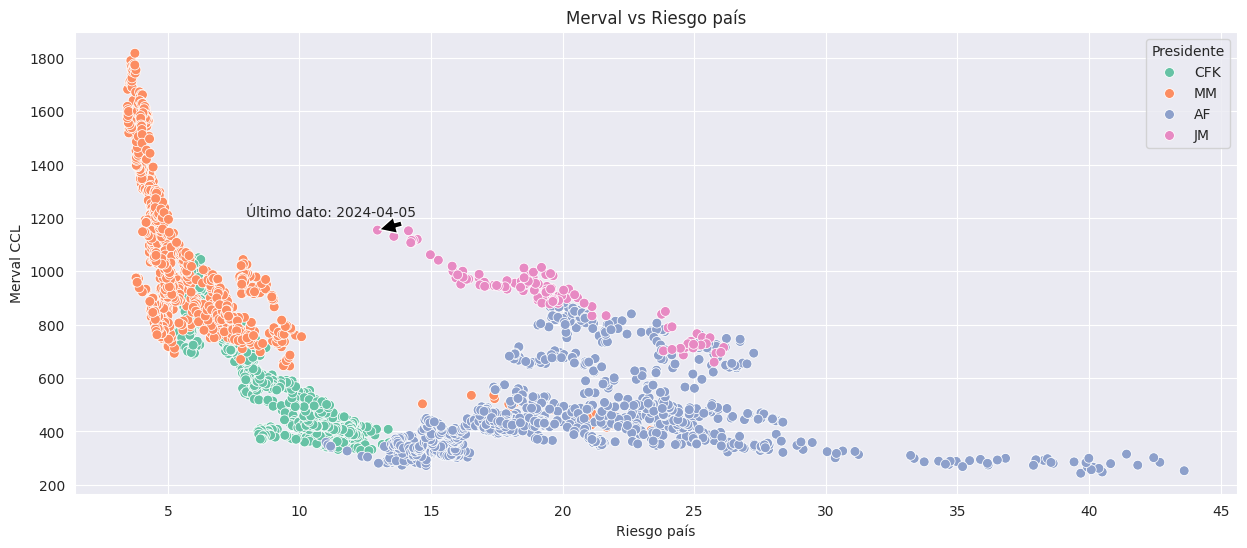

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")


# Crear un gráfico de dispersión con niveles
fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(x='EMBI Global Diversified Subindices', y='merval_ccl', hue='Presidente', data=df_comb, palette='Set2', marker='o', s=50)

# Puedes personalizar el gráfico según tus necesidades
plt.xlabel('Riesgo país')
plt.ylabel('Merval CCL')
plt.title('Merval vs Riesgo país')

# Mostrar la leyenda
plt.legend(title='Presidente')

# Obtener las coordenadas y la fecha del último dato
ultimo_dato = df_comb.tail(1)
coord_x = ultimo_dato['EMBI Global Diversified Subindices'].iloc[0]
coord_y = ultimo_dato['merval_ccl'].iloc[0]
fecha_ultimo_dato = ultimo_dato['Date'].iloc[0].strftime('%Y-%m-%d')  # Convertir la fecha a una cadena con el formato deseado

# Anotar el último dato con la etiqueta de la fecha correspondiente
plt.annotate(f'Último dato: {fecha_ultimo_dato}', xy=(coord_x, coord_y),
             xytext=(coord_x - 5, coord_y + 50),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

Text(0.5, 1.0, 'Riesgo pais por mandato')

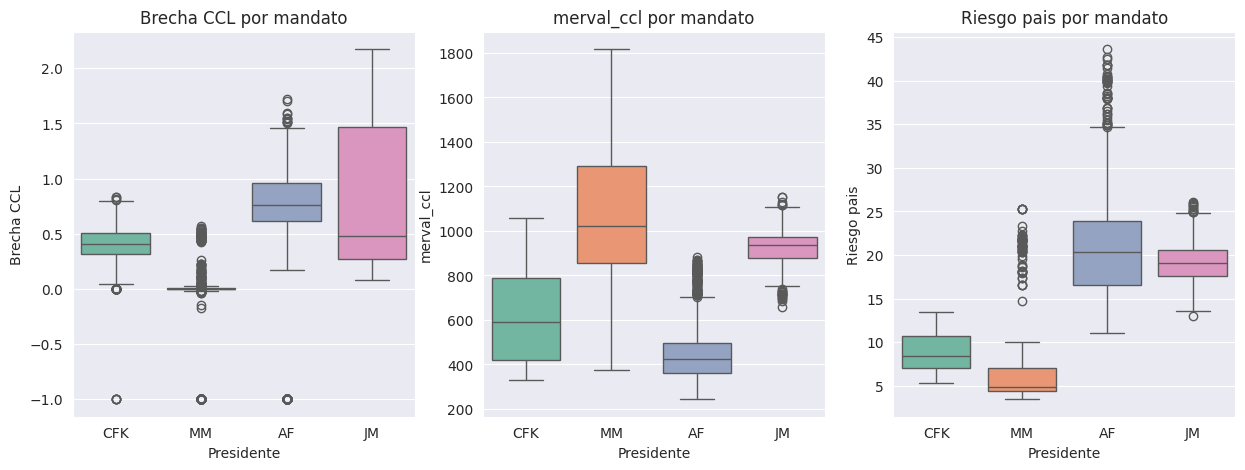

In [ ]:
# Ajustar el tamaño de la figura y dividirla en dos cuadrantes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Boxplot para Variable1 en el primer cuadrante
sns.boxplot(x='Presidente', y='Brecha CCL', data=df_comb, hue='Presidente', palette='Set2', ax=axes[0])
axes[0].set_xlabel('Presidente')
axes[0].set_ylabel('Brecha CCL')
axes[0].set_title('Brecha CCL por mandato')

# Boxplot para Variable2 en el segundo cuadrante
sns.boxplot(x='Presidente', y='merval_ccl', data=df_comb, hue='Presidente', palette='Set2', ax=axes[1])
axes[1].set_xlabel('Presidente')
axes[1].set_ylabel('merval_ccl')
axes[1].set_title('merval_ccl por mandato')
# Boxplot para Variable2 en el segundo cuadrante
sns.boxplot(x='Presidente', y='EMBI Global Diversified Subindices', data=df_comb, hue='Presidente', palette='Set2', ax=axes[2])
axes[2].set_xlabel('Presidente')
axes[2].set_ylabel('Riesgo pais')
axes[2].set_title('Riesgo pais por mandato')